In [40]:
import spacy
import en_core_web_sm
import re
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


#load a medium-sized language model
nlp = en_core_web_sm.load()


with open('cleaned-script.txt', 'r') as file:
    text = file.read()
    
doc = nlp(text)

# Top 10 verbs, nouns, adverbs and adjectives

In [41]:
def produce_plot (result, fig_name, kind):
    """Save plot of result 
    Parameters:
        result: data to draw
    fig_name: figure name
    kind: type of data used to plot
    """
    
    plt.bar(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result])
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.title("Top {}{} ({})".format(kind, 's', fig_name.title()))
    plt.subplots_adjust(bottom=0.30)
    plt.show()
    plt.close()

In [42]:
def top_pos(doc, pos, n, fig_name=""):
    """Find the top n spaCy pos
    
    Parameters:
    doc: spaCy's doc
    pos: pos we are interested in finding; "VERB", "NOUN", "ADJ" or "ADV"
    n: how many pos
    fig_name: name of the plot
    """
    
    pos_count={}
    for token in doc:
        #ignore stop words
        if token.is_stop:
            continue
            
        if token.pos_==pos:
            if token.lemma_ in pos_count:
                pos_count[token.lemma_] += 1
            else:
                pos_count[token.lemma_]=1
                
    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one
    # lastly, get the first n results
    result= sorted({k: v for (k,v) in pos_count.items() if v> 1}.items(),
                   key=lambda kv: kv[1], reverse=True)[:n]
    
    print("top 10 {} {}".format(pos, result))
    produce_plot(result, fig_name, pos)

top 10 VERB [('know', 59), ('go', 50), ('come', 44), ('get', 43), ('think', 38), ('tell', 27), ('kill', 26), ('need', 24), ('want', 22), ('let', 21)]


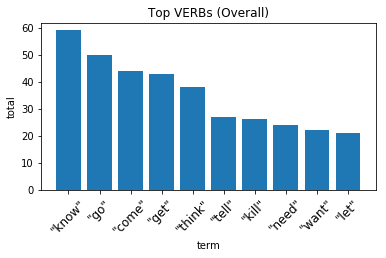

In [43]:
%matplotlib inline
top_pos(doc, 'VERB', 10, "overall")

top 10 NOUN [('stone', 25), ('life', 22), ('time', 21), ('way', 18), ('¦', 17), ('thing', 16), ('guy', 13), ('universe', 12), ('man', 12), ('ship', 11)]


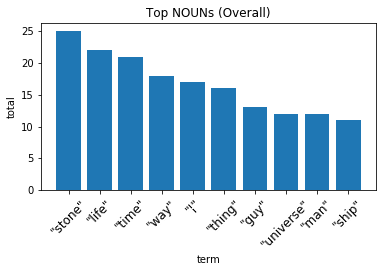

In [44]:
%matplotlib inline
top_pos(doc, 'NOUN', 10, "overall")

top 10 ADJ [('good', 19), ('right', 14), ('sorry', 13), ('little', 10), ('great', 9), ('sure', 8), ('dead', 7), ('big', 7), ('okay', 6), ('bad', 5)]


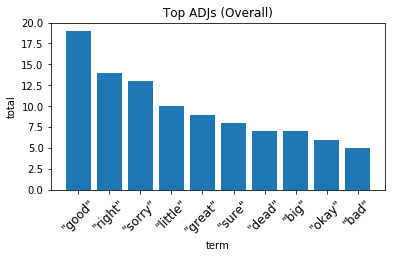

In [45]:
%matplotlib inline
top_pos(doc, 'ADJ', 10, "overall")

top 10 ADV [('right', 14), ('exactly', 8), ('maybe', 7), ('seriously', 6), ('home', 5), ('long', 5), ('away', 4), ('ago', 4), ('better', 4), ('probably', 3)]


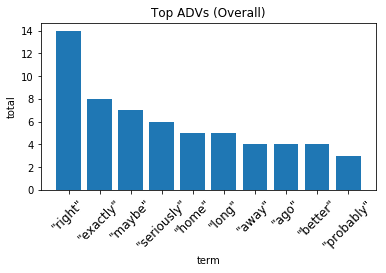

In [46]:
%matplotlib inline
top_pos(doc, 'ADV', 10, "overall")